### Importing Libraries

In [1]:
# import the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)
from sklearn.impute import SimpleImputer

### Importing Dataset

In [2]:
df = pd.read_csv('country_wise_latest.csv')

### Data Exploration

In [115]:
df

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [17]:
df.isnull()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
183,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
184,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
185,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [18]:
df.dtypes

Country/Region             object
Confirmed                   int64
Deaths                      int64
Recovered                   int64
Active                      int64
New cases                   int64
New deaths                  int64
New recovered               int64
Deaths / 100 Cases        float64
Recovered / 100 Cases     float64
Deaths / 100 Recovered    float64
Confirmed last week         int64
1 week change               int64
1 week % increase         float64
WHO Region                 object
dtype: object

In [20]:
df.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
count,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.00,1.870000e+02,187.000000,187.000000
mean,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04,1222.957219,28.957219,933.812834,3.019519,64.820535,inf,7.868248e+04,9448.459893,13.606203
std,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05,5710.374790,120.037173,4197.719635,3.454302,26.287694,NaN,3.382737e+05,47491.127684,24.509838
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.000000e+01,-47.000000,-3.840000
25%,1.114000e+03,18.500000,6.265000e+02,1.415000e+02,4.000000,0.000000,0.000000,0.945000,48.770000,1.45,1.051500e+03,49.000000,2.775000
50%,5.059000e+03,108.000000,2.815000e+03,1.600000e+03,49.000000,1.000000,22.000000,2.150000,71.320000,3.62,5.020000e+03,432.000000,6.890000
75%,4.046050e+04,734.000000,2.260600e+04,9.149000e+03,419.500000,6.000000,221.000000,3.875000,86.885000,6.44,3.708050e+04,3172.000000,16.855000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,56336.000000,1076.000000,33728.000000,28.560000,100.000000,inf,3.834677e+06,455582.000000,226.320000


### Data Cleaning

In [21]:
df.rename(columns = {'Country/Region' : 'Country'}, inplace = True)

In [22]:
# df['Date'] = pd.to_datetime(df['Date'])

In [23]:
df.values

array([['Afghanistan', 36263, 1269, ..., 737, 2.07,
        'Eastern Mediterranean'],
       ['Albania', 4880, 144, ..., 709, 17.0, 'Europe'],
       ['Algeria', 27973, 1163, ..., 4282, 18.07, 'Africa'],
       ...,
       ['Yemen', 1691, 483, ..., 72, 4.45, 'Eastern Mediterranean'],
       ['Zambia', 4552, 140, ..., 1226, 36.86, 'Africa'],
       ['Zimbabwe', 2704, 36, ..., 991, 57.85, 'Africa']], dtype=object)

In [24]:
df

,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa


### Data Visualization

In [166]:
# Total sum of death cases

df['Deaths'].sum()

654036

In [119]:
# Total sum of recovered cases

df['Recovered'].sum()

9468087

In [27]:
# Average of the recovered cases

df['Recovered'].mean()

50631.48128342246

In [120]:
# Sorting the confirmed cases in descending order

df1 = df.sort_values('Confirmed', ascending = False)
df1

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
173,US,4290259,148011,1325804,2816444,56336,1076,27941,3.45,30.90,11.16,3834677,455582,11.88,Americas
23,Brazil,2442375,87618,1846641,508116,23284,614,33728,3.59,75.61,4.74,2118646,323729,15.28,Americas
79,India,1480073,33408,951166,495499,44457,637,33598,2.26,64.26,3.51,1155338,324735,28.11,South-East Asia
138,Russia,816680,13334,602249,201097,5607,85,3077,1.63,73.74,2.21,776212,40468,5.21,Europe
154,South Africa,452529,7067,274925,170537,7096,298,9848,1.56,60.75,2.57,373628,78901,21.12,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,Dominica,18,0,18,0,0,0,0,0.00,100.00,0.00,18,0,0.00,Americas
140,Saint Kitts and Nevis,17,0,15,2,0,0,0,0.00,88.24,0.00,17,0,0.00,Americas
68,Greenland,14,0,13,1,1,0,0,0.00,92.86,0.00,13,1,7.69,Europe
75,Holy See,12,0,12,0,0,0,0,0.00,100.00,0.00,12,0,0.00,Europe


In [118]:
# Which countries were highly affected?

df1.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
173,US,4290259,148011,1325804,2816444,56336,1076,27941,3.45,30.90,11.16,3834677,455582,11.88,Americas
23,Brazil,2442375,87618,1846641,508116,23284,614,33728,3.59,75.61,4.74,2118646,323729,15.28,Americas
79,India,1480073,33408,951166,495499,44457,637,33598,2.26,64.26,3.51,1155338,324735,28.11,South-East Asia
138,Russia,816680,13334,602249,201097,5607,85,3077,1.63,73.74,2.21,776212,40468,5.21,Europe
154,South Africa,452529,7067,274925,170537,7096,298,9848,1.56,60.75,2.57,373628,78901,21.12,Africa


### US, Brazil, India, Russia and South Africa were the top five five highly affected countries.

In [5]:
# Top 10 countries that were highly affected

df1.head(10)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
173,US,4290259,148011,1325804,2816444,56336,1076,27941,3.45,30.90,11.16,3834677,455582,11.88,Americas
23,Brazil,2442375,87618,1846641,508116,23284,614,33728,3.59,75.61,4.74,2118646,323729,15.28,Americas
79,India,1480073,33408,951166,495499,44457,637,33598,2.26,64.26,3.51,1155338,324735,28.11,South-East Asia
138,Russia,816680,13334,602249,201097,5607,85,3077,1.63,73.74,2.21,776212,40468,5.21,Europe
154,South Africa,452529,7067,274925,170537,7096,298,9848,1.56,60.75,2.57,373628,78901,21.12,Africa
111,Mexico,395489,44022,303810,47657,4973,342,8588,11.13,76.82,14.49,349396,46093,13.19,Americas
132,Peru,389717,18418,272547,98752,13756,575,4697,4.73,69.93,6.76,357681,32036,8.96,Americas
35,Chile,347923,9187,319954,18782,2133,75,1859,2.64,91.96,2.87,333029,14894,4.47,Americas
177,United Kingdom,301708,45844,1437,254427,688,7,3,15.19,0.48,3190.26,296944,4764,1.60,Europe
81,Iran,293606,15912,255144,22550,2434,212,1931,5.42,86.90,6.24,276202,17404,6.30,Eastern Mediterranean


In [121]:
# Sorting the death cases in descending order

df2 = df.sort_values('Deaths', ascending = False)
df2

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
173,US,4290259,148011,1325804,2816444,56336,1076,27941,3.45,30.90,11.16,3834677,455582,11.88,Americas
23,Brazil,2442375,87618,1846641,508116,23284,614,33728,3.59,75.61,4.74,2118646,323729,15.28,Americas
177,United Kingdom,301708,45844,1437,254427,688,7,3,15.19,0.48,3190.26,296944,4764,1.60,Europe
111,Mexico,395489,44022,303810,47657,4973,342,8588,11.13,76.82,14.49,349396,46093,13.19,Americas
85,Italy,246286,35112,198593,12581,168,5,147,14.26,80.64,17.68,244624,1662,0.68,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Laos,20,0,19,1,0,0,0,0.00,95.00,0.00,19,1,5.26,Western Pacific
68,Greenland,14,0,13,1,1,0,0,0.00,92.86,0.00,13,1,7.69,Europe
30,Cambodia,226,0,147,79,1,0,4,0.00,65.04,0.00,171,55,32.16,Western Pacific
69,Grenada,23,0,23,0,0,0,0,0.00,100.00,0.00,23,0,0.00,Americas


In [39]:
df2.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
173,US,4290259,148011,1325804,2816444,56336,1076,27941,3.45,30.90,11.16,3834677,455582,11.88,Americas
23,Brazil,2442375,87618,1846641,508116,23284,614,33728,3.59,75.61,4.74,2118646,323729,15.28,Americas
177,United Kingdom,301708,45844,1437,254427,688,7,3,15.19,0.48,3190.26,296944,4764,1.60,Europe
111,Mexico,395489,44022,303810,47657,4973,342,8588,11.13,76.82,14.49,349396,46093,13.19,Americas
85,Italy,246286,35112,198593,12581,168,5,147,14.26,80.64,17.68,244624,1662,0.68,Europe


### US, Brazil, United Kingdom, Mexico and Italy had the highest death rates.

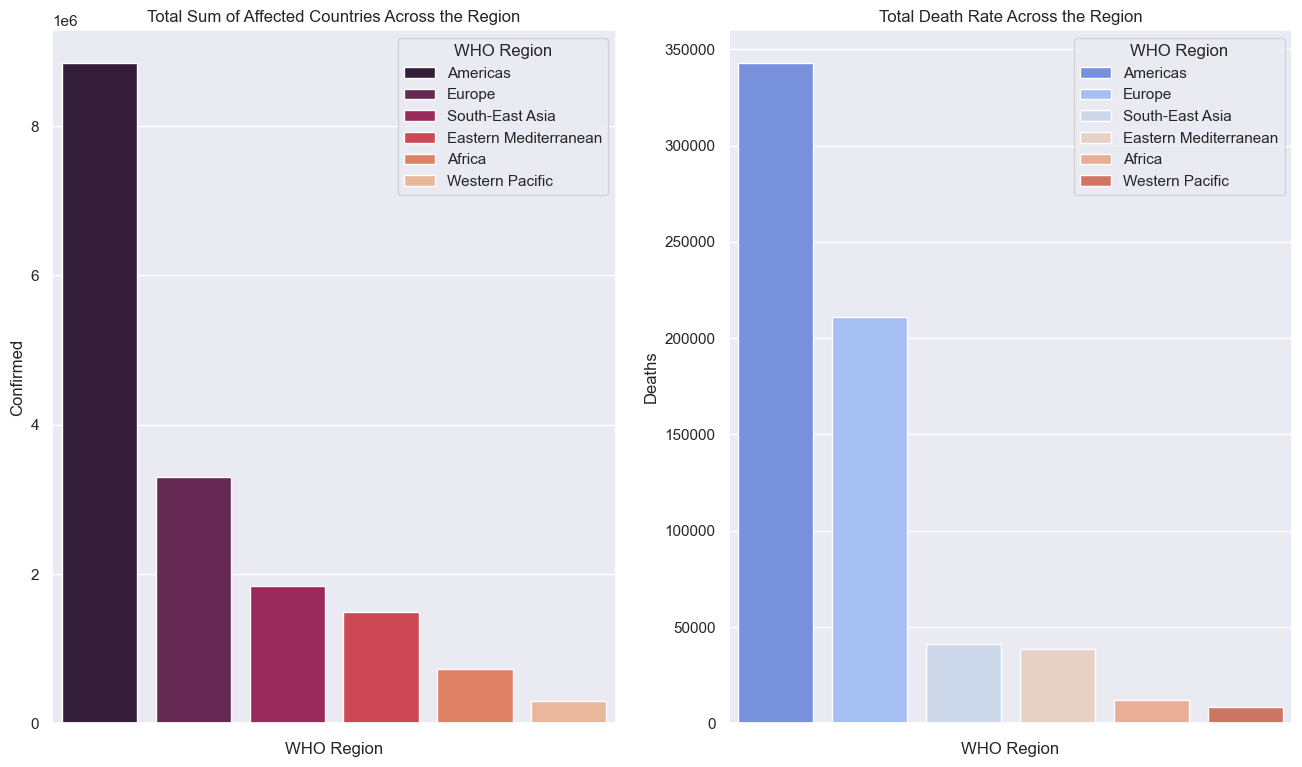

In [168]:
# Analyzing the total sum of affected countries across the region by the total death rate across the region.

sns.set(rc={'figure.figsize':(16,9)})
g = df.groupby('WHO Region', as_index=False)['Confirmed'].sum().sort_values(by='Confirmed', ascending=False).head(6)
plt.subplot(1,2,1)

sns.barplot(data=g, x='WHO Region', y='Confirmed', hue='WHO Region', palette = 'rocket', edgecolor = 'white', dodge=False).set(xticklabels=[])
plt.title('Total Sum of Affected Countries Across the Region');



sns.set(rc={'figure.figsize':(16,9)})
g = df.groupby('WHO Region', as_index=False)['Deaths'].sum().sort_values(by='Deaths', ascending=False).head(6)
plt.subplot(1,2,2)

sns.barplot(data=g, x='WHO Region', y='Deaths', hue='WHO Region', palette = 'coolwarm', edgecolor = 'white', dodge=False).set(xticklabels=[])
plt.title('Total Death Rate Across the Region');

In [3]:
df.Confirmed.describe()

count    1.870000e+02
mean     8.813094e+04
std      3.833187e+05
min      1.000000e+01
25%      1.114000e+03
50%      5.059000e+03
75%      4.046050e+04
max      4.290259e+06
Name: Confirmed, dtype: float64

In [6]:
df.Confirmed.value_counts()

Confirmed
24        2
86        2
10621     2
109597    1
9132      1
         ..
1137      1
207112    1
33624     1
4227      1
2704      1
Name: count, Length: 184, dtype: int64

### America had the highest number of confirmed cases and also the highest number of death rate

In [23]:
df1.tail()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
49,Dominica,18,0,18,0,0,0,0,0.0,100.00,0.0,18,0,0.00,Americas
140,Saint Kitts and Nevis,17,0,15,2,0,0,0,0.0,88.24,0.0,17,0,0.00,Americas
68,Greenland,14,0,13,1,1,0,0,0.0,92.86,0.0,13,1,7.69,Europe
75,Holy See,12,0,12,0,0,0,0,0.0,100.00,0.0,12,0,0.00,Europe
183,Western Sahara,10,1,8,1,0,0,0,10.0,80.00,12.5,10,0,0.00,Africa


In [89]:
# Sorting the recovered cases in descending order

df3 = df.sort_values('Recovered', ascending = False)
df3

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
23,Brazil,2442375,87618,1846641,508116,23284,614,33728,3.59,75.61,4.74,2118646,323729,15.28,Americas
173,US,4290259,148011,1325804,2816444,56336,1076,27941,3.45,30.90,11.16,3834677,455582,11.88,Americas
79,India,1480073,33408,951166,495499,44457,637,33598,2.26,64.26,3.51,1155338,324735,28.11,South-East Asia
138,Russia,816680,13334,602249,201097,5607,85,3077,1.63,73.74,2.21,776212,40468,5.21,Europe
35,Chile,347923,9187,319954,18782,2133,75,1859,2.64,91.96,2.87,333029,14894,4.47,Americas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,Canada,116458,8944,0,107514,682,11,0,7.68,0.00,inf,112925,3533,3.13,Americas
168,Timor-Leste,24,0,0,24,0,0,0,0.00,0.00,0.00,24,0,0.00,South-East Asia
147,Serbia,24141,543,0,23598,411,9,0,2.25,0.00,inf,21253,2888,13.59,Europe
163,Syria,674,40,0,634,24,2,0,5.93,0.00,inf,522,152,29.12,Eastern Mediterranean


In [90]:
# Sorting the active cases in descending order

df4 = df.sort_values('Active', ascending = False)
df4

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
173,US,4290259,148011,1325804,2816444,56336,1076,27941,3.45,30.90,11.16,3834677,455582,11.88,Americas
23,Brazil,2442375,87618,1846641,508116,23284,614,33728,3.59,75.61,4.74,2118646,323729,15.28,Americas
79,India,1480073,33408,951166,495499,44457,637,33598,2.26,64.26,3.51,1155338,324735,28.11,South-East Asia
177,United Kingdom,301708,45844,1437,254427,688,7,3,15.19,0.48,3190.26,296944,4764,1.60,Europe
138,Russia,816680,13334,602249,201097,5607,85,3077,1.63,73.74,2.21,776212,40468,5.21,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,Holy See,12,0,12,0,0,0,0,0.00,100.00,0.00,12,0,0.00,Europe
143,San Marino,699,42,657,0,0,0,0,6.01,93.99,6.39,699,0,0.00,Europe
24,Brunei,141,3,138,0,0,0,0,2.13,97.87,2.17,141,0,0.00,Western Pacific
49,Dominica,18,0,18,0,0,0,0,0.00,100.00,0.00,18,0,0.00,Americas


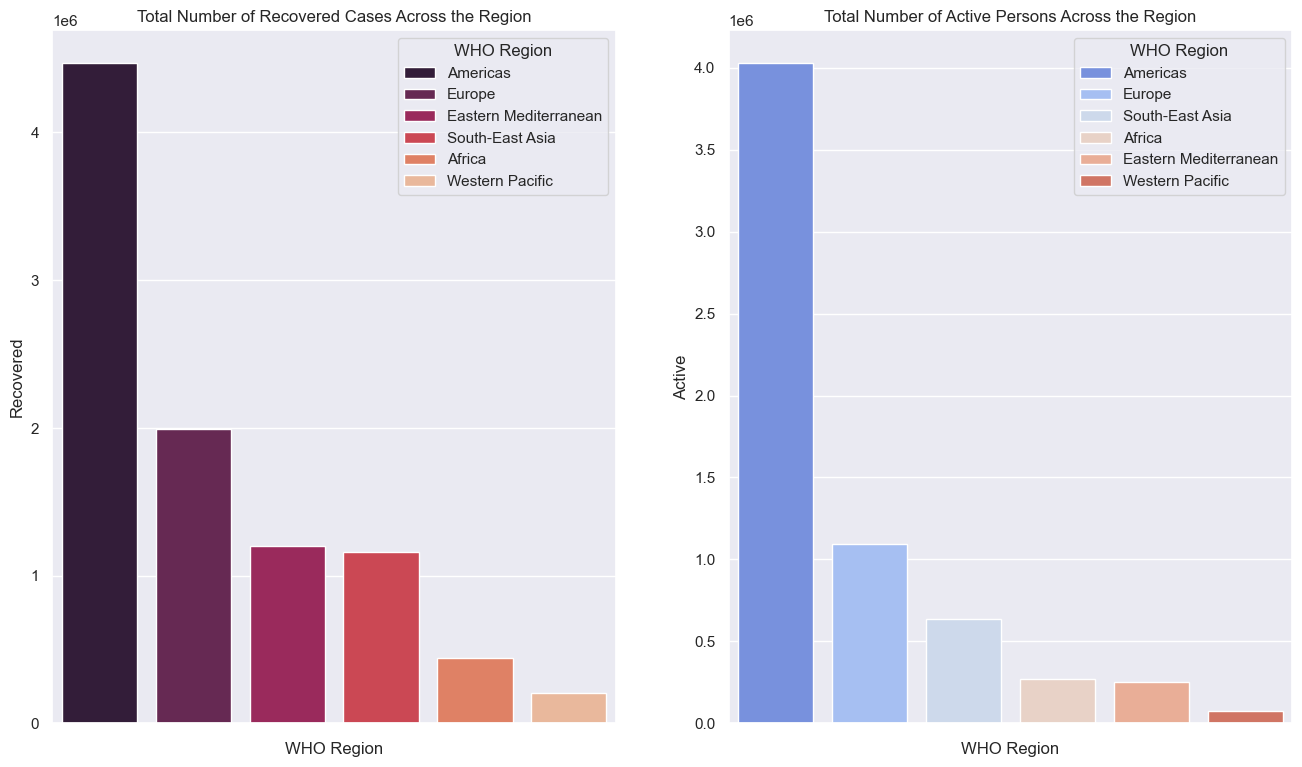

In [167]:
# Analyzing the total number of recovered cases by the total number of active persons across the region.

sns.set(rc={'figure.figsize':(16,9)})
plt.subplot(1,2,1)

g = df.groupby('WHO Region', as_index=False)['Recovered'].sum().sort_values('Recovered', ascending=False).head(10)
sns.barplot(data=g, x='WHO Region', y='Recovered', hue='WHO Region', palette = 'rocket', edgecolor = 'white', dodge=False).set(xticklabels=[])
plt.title('Total Number of Recovered Cases Across the Region');



sns.set(rc={'figure.figsize':(16,9)})
plt.subplot(1,2,2)

g = df.groupby('WHO Region', as_index=False)['Active'].sum().sort_values('Active', ascending=False).head(10)
sns.barplot(data=g, x='WHO Region', y='Active', hue='WHO Region', palette = 'coolwarm', edgecolor = 'white', dodge=False).set(xticklabels=[]);
plt.title('Total Number of Active Persons Across the Region');



### America had the highest number of recovered cases and also the highest number of active persons across the region.

In [46]:
df3.tail()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
32,Canada,116458,8944,0,107514,682,11,0,7.68,0.0,inf,112925,3533,3.13,Americas
168,Timor-Leste,24,0,0,24,0,0,0,0.00,0.0,0.0,24,0,0.00,South-East Asia
147,Serbia,24141,543,0,23598,411,9,0,2.25,0.0,inf,21253,2888,13.59,Europe
163,Syria,674,40,0,634,24,2,0,5.93,0.0,inf,522,152,29.12,Eastern Mediterranean
161,Sweden,79395,5700,0,73695,398,3,0,7.18,0.0,inf,78048,1347,1.73,Europe


In [47]:
df4.tail()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
75,Holy See,12,0,12,0,0,0,0,0.00,100.00,0.00,12,0,0.0,Europe
143,San Marino,699,42,657,0,0,0,0,6.01,93.99,6.39,699,0,0.0,Europe
24,Brunei,141,3,138,0,0,0,0,2.13,97.87,2.17,141,0,0.0,Western Pacific
49,Dominica,18,0,18,0,0,0,0,0.00,100.00,0.00,18,0,0.0,Americas
69,Grenada,23,0,23,0,0,0,0,0.00,100.00,0.00,23,0,0.0,Americas


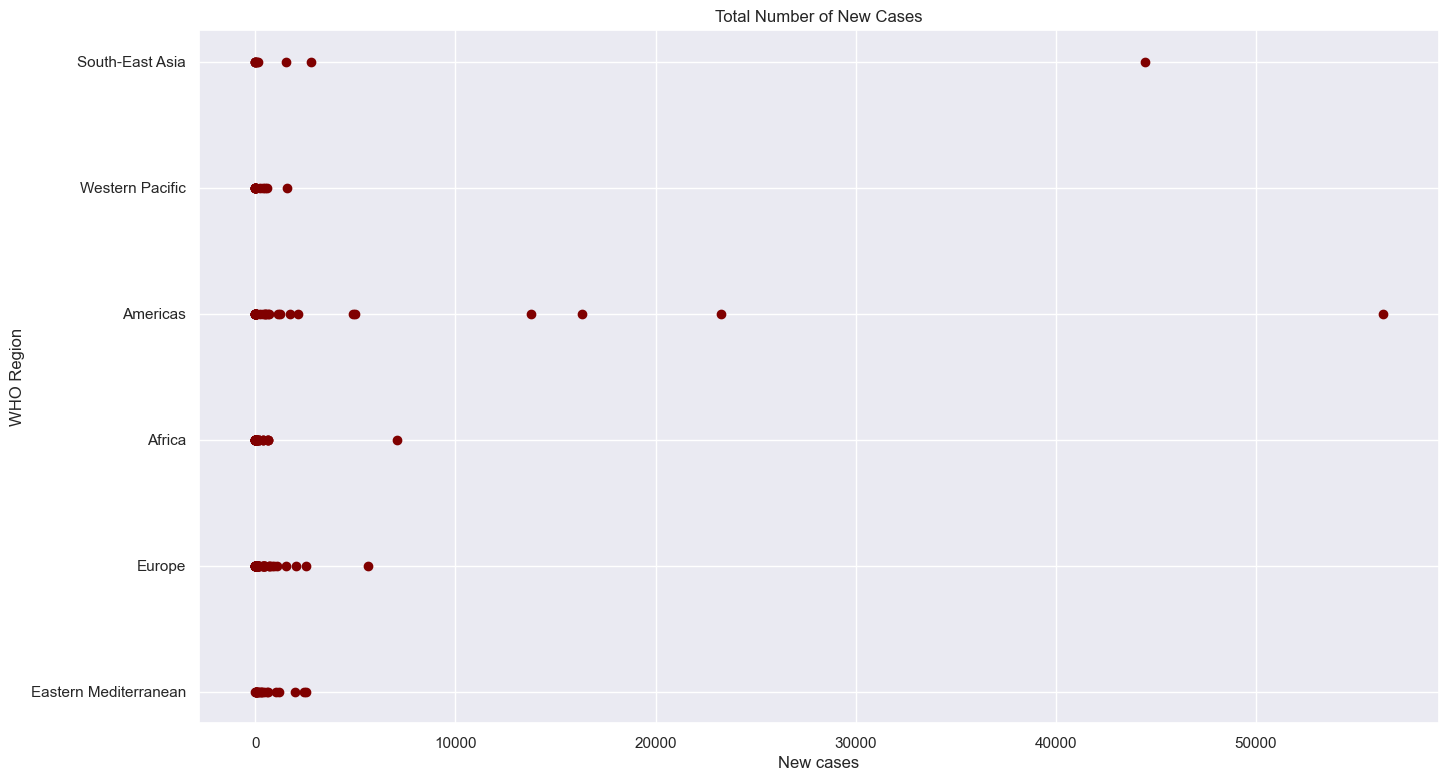

In [134]:
# Total Number of new cases

plt.scatter(x = 'New cases', y = 'WHO Region', color = 'maroon', data = df)
plt.title('Total Number of New Cases')
plt.xlabel('New cases')
plt.ylabel('WHO Region')           
plt.show;

### The total number of new cases was more in America and South-East Asia.

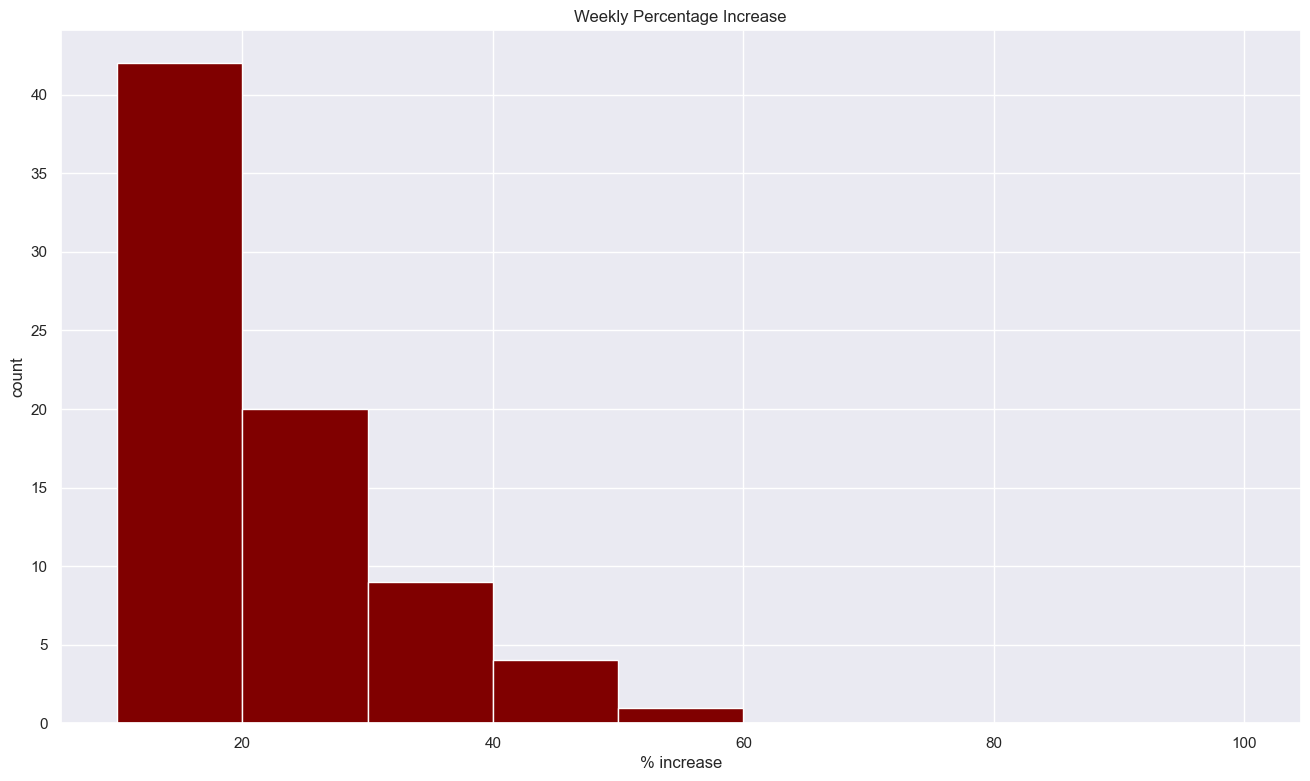

In [128]:
# Counting the weekly % increase.

bins=[10,20,30,40,50,60,70,80,90,100]
plt.hist(data = df, x = '1 week % increase', bins = bins, color = 'maroon')
plt.title('Weekly Percentage Increase')
plt.xlabel('% increase')
plt.ylabel('count')
plt.show;

### From the analysis, the number of cases decreased across the weeks. 

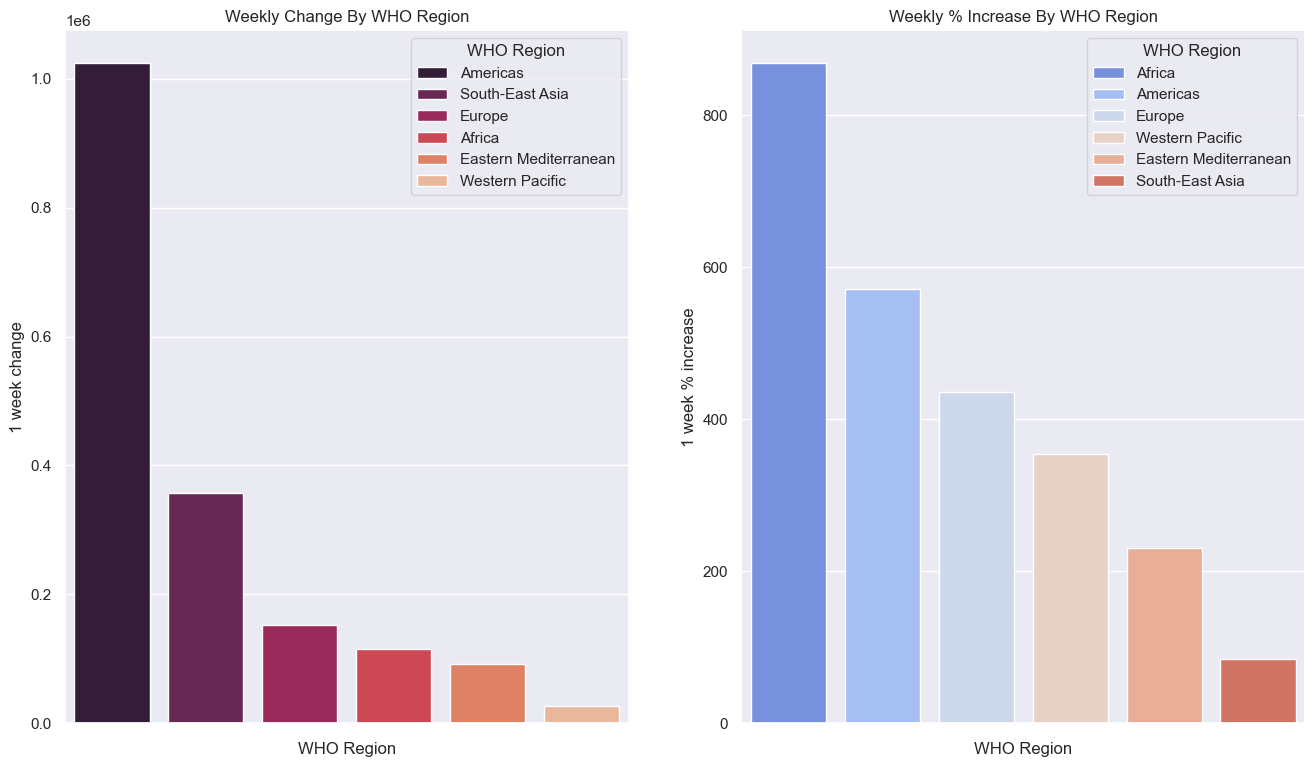

In [169]:
# Analyzing the weekly change and weekly % increase by WHO Region.

sns.set(rc={'figure.figsize':(16,9)})
plt.subplot(1,2,1)
g = df.groupby('WHO Region', as_index=False)['1 week change'].sum().sort_values('1 week change', ascending=False).head(6)
sns.barplot(data=g, x='WHO Region', y='1 week change', hue='WHO Region', palette = 'rocket', edgecolor = 'white', dodge=False).set(xticklabels=[]);
plt.title('Weekly Change By WHO Region');




sns.set(rc={'figure.figsize':(16,9)})
plt.subplot(1,2,2)
g = df.groupby('WHO Region', as_index=False)['1 week % increase'].sum().sort_values('1 week % increase', ascending=False).head(6)
sns.barplot(data=g, x='WHO Region', y='1 week % increase', hue='WHO Region', palette = 'coolwarm', edgecolor = 'white', dodge=False).set(xticklabels=[]);
plt.title('Weekly % Increase By WHO Region');


### From the visualization above, America had the highest number of weekly change while Africa had the most weekly percentage increase recovery.

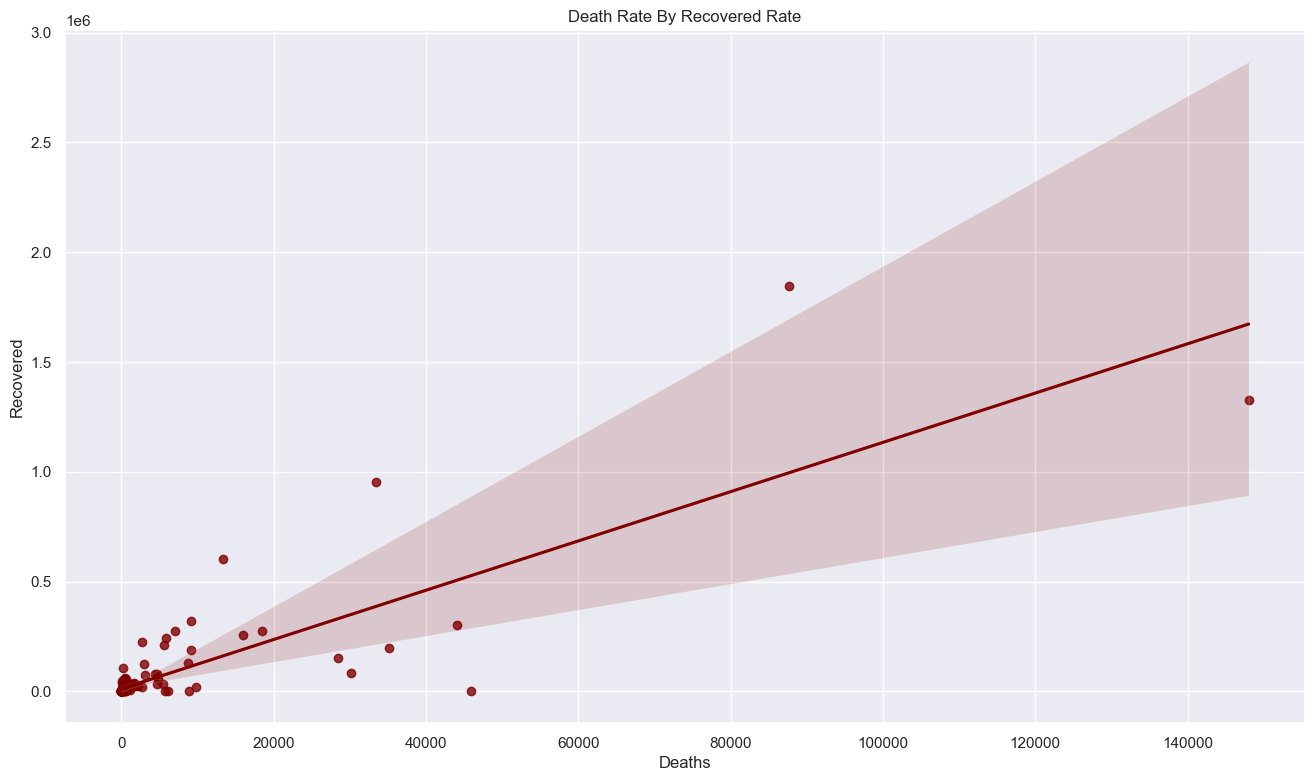

In [136]:
# Analyzing the deaths and recovery rates.

sns.regplot(data = df, x = 'Deaths', y = 'Recovered', color = 'maroon')
plt.title('Death Rate By Recovered Rate')
plt.xlabel('Deaths')
plt.ylabel('Recovered')
plt.show;

In [11]:
df['Deaths'].sum()

654036

In [12]:
df['Recovered'].sum()

9468087

### From the analysis, the relative rate of recovered persons were more than that of deaths.

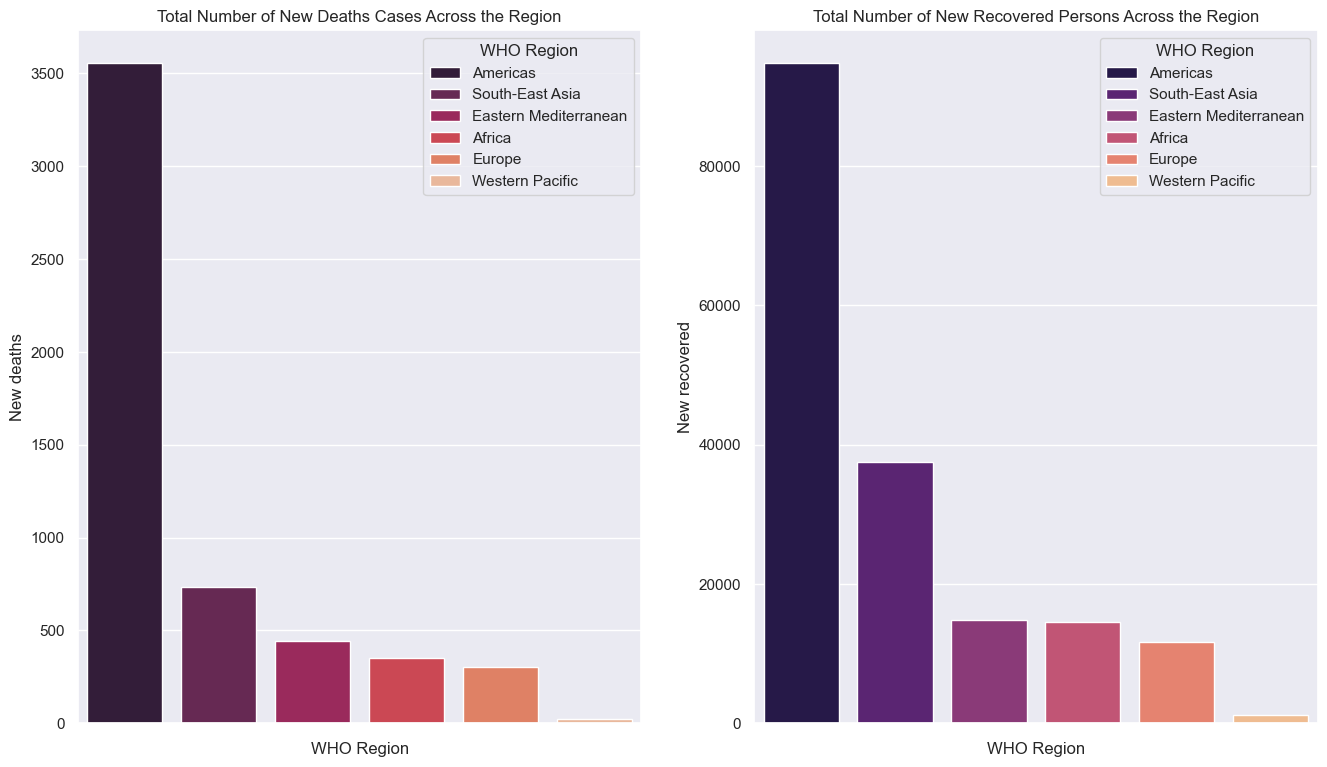

In [129]:
# Analyzing the new death rate and the new recovered rate across the region

sns.set(rc={'figure.figsize':(16,9)})
plt.subplot(1,2,1)

g = df.groupby('WHO Region', as_index=False)['New deaths'].sum().sort_values('New deaths', ascending=False).tail(6)
sns.barplot(data=g, x='WHO Region', y='New deaths', hue='WHO Region', palette = 'rocket', edgecolor = 'white', dodge=False).set(xticklabels=[]);
plt.title('Total Number of New Deaths Cases Across the Region');



sns.set(rc={'figure.figsize':(16,9)})
plt.subplot(1,2,2)

g = df.groupby('WHO Region', as_index=False)['New recovered'].sum().sort_values('New recovered', ascending=False).tail(6)
sns.barplot(data=g, x='WHO Region', y='New recovered', hue='WHO Region', palette = 'magma', edgecolor = 'white', dodge=False).set(xticklabels=[]);
plt.title('Total Number of New Recovered Persons Across the Region');


### According to the analysis above, the total number of new recovered cases across the region were more than that of the new death cases.

### America had over 90000 new recovered cases across the region were as its new deaths rate was only 3600       across the region.
### South-East Asia had 38000 new recovered cases across the region and its new deaths rate was 750
### Eastern Mediterranean had 14000 new recovered cases and its new deaths rate was 400 etc.


In [13]:
df['New deaths'].sum()

5415

In [ ]:
df['New recovered'].sum()